In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку:

In [ ]:
df = pd.read_csv('/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


1. id: уникальный идентификатор
2. gender: пол пациента "Male", "Female" or "Other"
3. age: возраст пациента
4. hypertension: 0, если у пациента нет гипертонии, 1, если у пациента гипертония
5. heart_disease:  0, если у пациента нет заболеваний сердца, 1, если у пациента есть заболевание сердца
6. ever_married: когда либо женат "No" или "Yes"
7. work_type: тип работы "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: где проживает "Rural" or "Urban"
9. avg_glucose_level: средний уровень глюкозы в крови
10. bmi: индекс массы тела
11. smoking_status: статус курения "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1, если у пациента был инсульт, или 0, если нет

Так как у нас есть категориальные и численные признаки, необходимо разделить их, чтобы вывести их основные характеристики и признаки.

In [ ]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']  # Выберет категориальные признаки
categorical_features = df[cat_features]
num_features = ['id', 'age', 'avg_glucose_level', 'bmi']
numerical_features = df[num_features]  # Выберет численные признаки


In [ ]:
numerical_features.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [ ]:
categorical_features.astype('object').describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Далее, необходимо выяснить, сколько незаполненных значений.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Далее, можно удалить признак id, так как он неважен.

In [ ]:
df.drop(['id'], axis=1, inplace=True)

Далее, сформулируем задачу предсказания: целевым признаком будет "stroke". Он отображает, был инсульт у пациента или нет.

In [ ]:
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['stroke'].mean()

0.0487279843444227

Мы видим, что из общей выборки пациенты с инсультом составляют 4.8% от всех.

Далее, перейдем к этапу заполнения пропущенных значений

In [ ]:
df['bmi'][(df['hypertension'] == 0) & (df['heart_disease']== 0)].mean()

28.408752632810675

In [ ]:
df['bmi'][(df['hypertension'] == 0) & (df['heart_disease']== 1)].mean()

29.982702702702703

In [ ]:
df['bmi'][(df['hypertension'] == 1) & (df['heart_disease']== 1)].mean()

31.381034482758622

In [ ]:
df['bmi'][(df['hypertension'] == 1) & (df['heart_disease']== 0)].mean()

33.28091603053435

In [ ]:
df['bmi'][(df['age'] < 25)].mean()

23.19909015715467

In [ ]:
df['bmi'][(df['age'] > 25) & (df['age'] < 45)].mean()

30.76810990840966

In [ ]:
df['bmi'][(df['age'] < 61) & (df['age'] > 45)].mean()

31.67231441048035

In [ ]:
df['bmi'][df['age'] > 61].mean()

29.85405405405406

In [ ]:
df['bmi'][(df['hypertension'] == 0) & (df['age'] < 25)].mean()

23.058686616791352

In [ ]:
df['bmi'][(df['hypertension'] == 0) & (df['age'] > 25)].mean()

30.49471875

In [ ]:
df['bmi'][(df['hypertension'] == 1) & (df['age'] > 25)].mean()

32.78966292134832

In [ ]:
df['bmi'][(df['hypertension'] == 1) & (df['age'] < 25)].mean()

51.35

Проведя анализ, видим, что лучше всего заметно различие в ИМТ (индекс массы тела) при интервалах возраста 0-25 и 25+, влияние сердечных заболеваний на индекс массы тела минимален. Также, видно, что признак гипертонии важен

In [ ]:
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 0) & (df['age'] <= 25), 'bmi'] = df['bmi'][(df['hypertension'] == 0) & (df['age'] < 25)].mean()
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 0) & (df['age'] > 25), 'bmi'] = df['bmi'][(df['hypertension'] == 0) & (df['age'] > 25)].mean()
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 1) & (df['age'] <= 25), 'bmi'] = df['bmi'][(df['hypertension'] == 1) & (df['age'] < 25)].mean()
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 1) & (df['age'] > 25), 'bmi'] = df['bmi'][(df['hypertension'] == 1) & (df['age'] > 25)].mean()


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Как видно, мы заполнили все пропущенные значения.

In [ ]:
df.groupby(['gender', 'stroke'])['stroke'].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

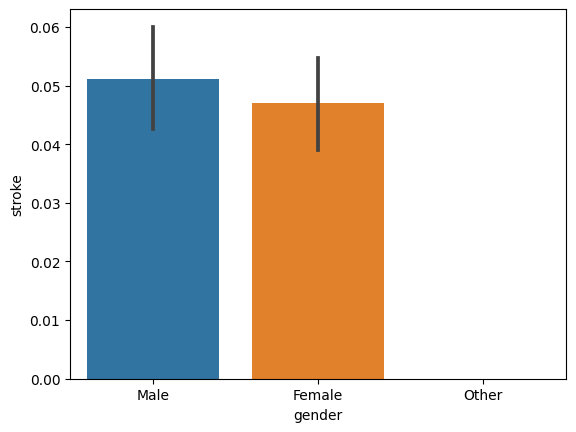

In [ ]:
sns.barplot(x = "gender", y = "stroke", data = df);

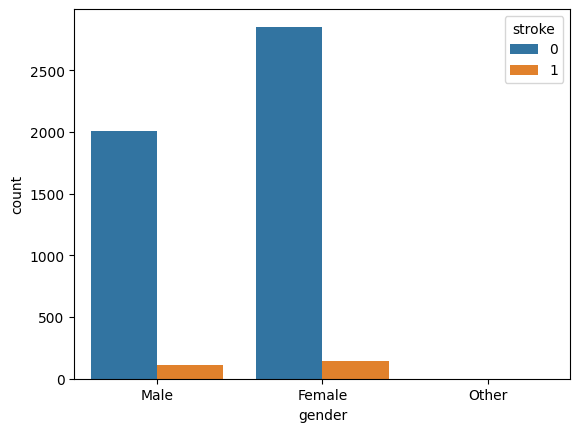

In [ ]:
sns.countplot(x='gender',hue='stroke', data=df);


Как мы можем видеть, признак "gender" не имеет сильную зависимость с целевым признаком.

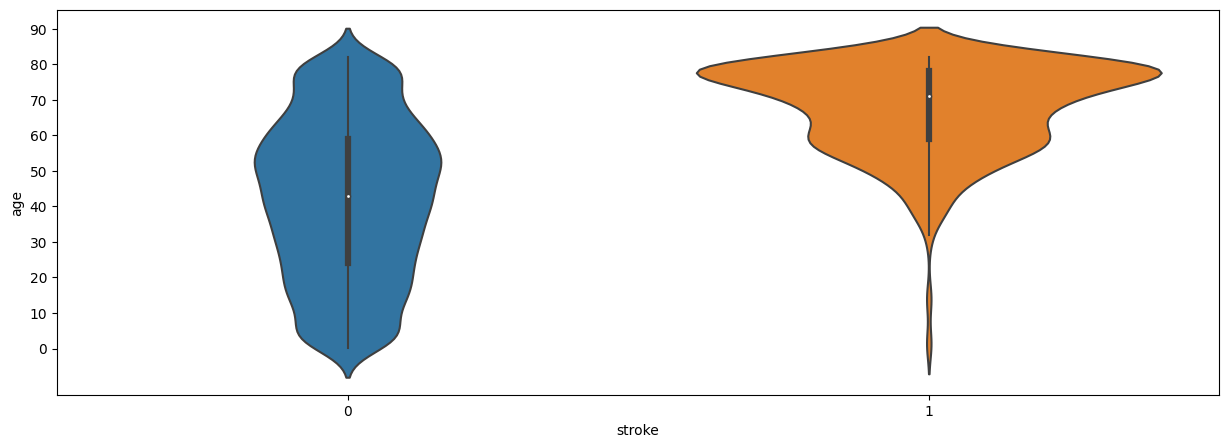

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(y="age", x="stroke", data=df)
ax.set_yticks(range(0, 100, 10))
plt.show()

Видно, что возраст сильно влияет на наш целевой признак.

Признак гипертония:

In [ ]:
df.groupby(['hypertension', 'stroke'])['stroke'].count()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

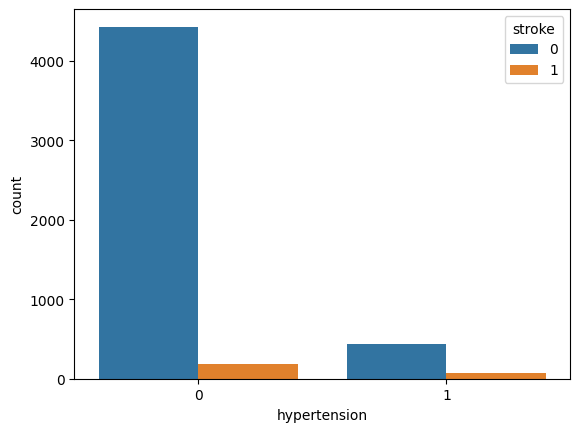

In [ ]:
sns.countplot(x='hypertension',hue='stroke', data=df);

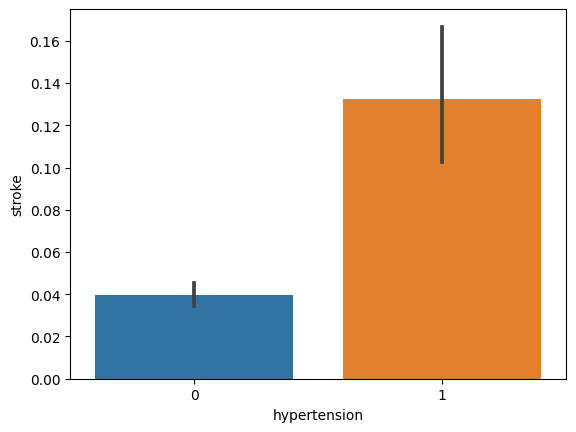

In [ ]:
sns.barplot(x = "hypertension", y = "stroke", data = df);

Признак заболевания сердца:

In [ ]:
df.groupby(['heart_disease', 'stroke'])['stroke'].count()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64

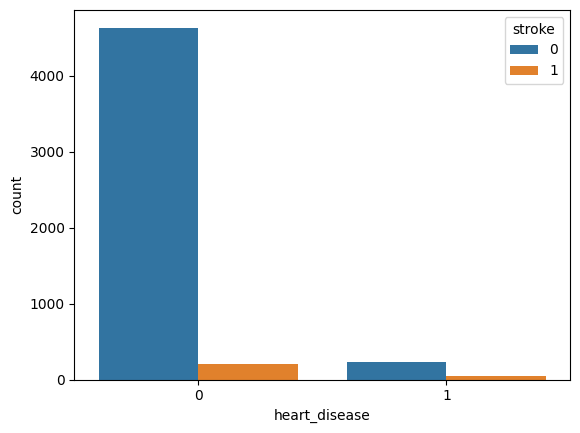

In [ ]:
sns.countplot(x='heart_disease',hue='stroke', data=df);

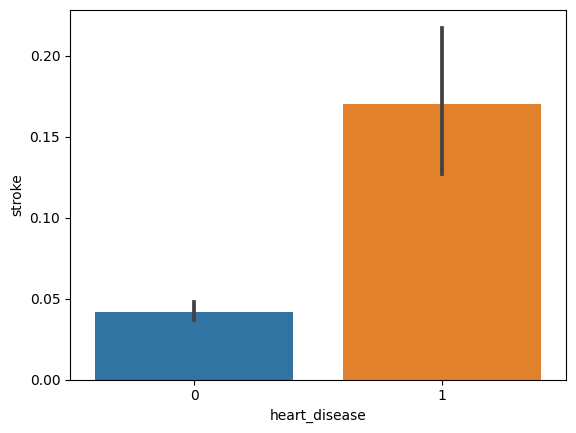

In [ ]:
sns.barplot(x = "heart_disease", y = "stroke", data = df);

Признак был ли когда то женат

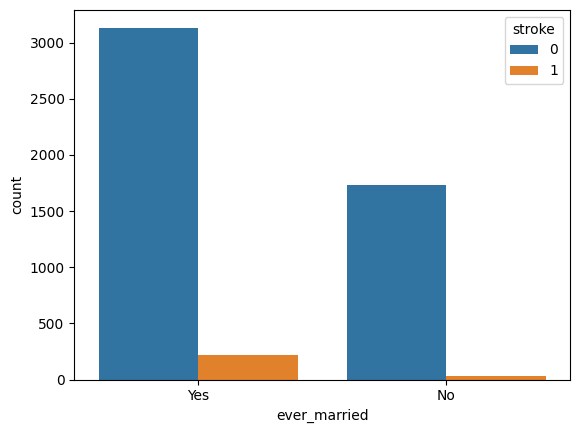

In [ ]:
sns.countplot(x='ever_married',hue='stroke', data=df);

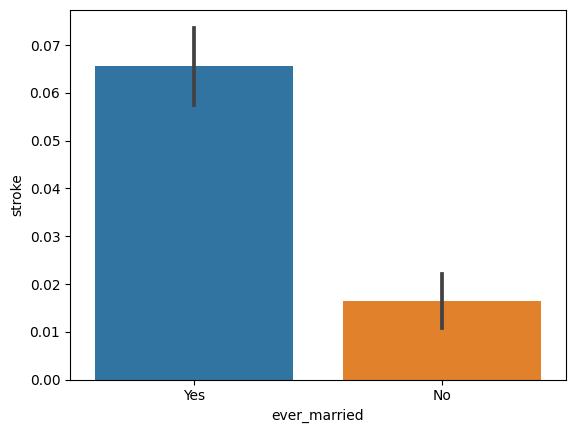

In [ ]:
sns.barplot(x = "ever_married", y = "stroke", data = df);

In [ ]:
df.groupby(['ever_married', 'stroke'])['stroke'].count()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64

Как мы видим, риск инсульта у людей, которые когда-либо были женаты выше.

Признак тип работы:

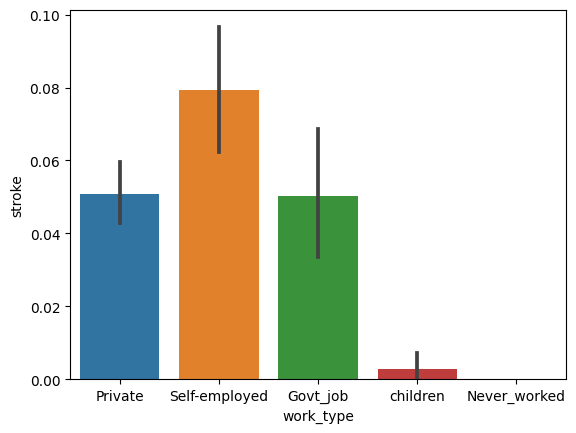

In [ ]:
sns.barplot(x = "work_type", y = "stroke", data = df);

In [ ]:
df.groupby(['work_type', 'stroke'])['stroke'].count()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64

Самозанятые пациенты больше подвергнуты инсульту.

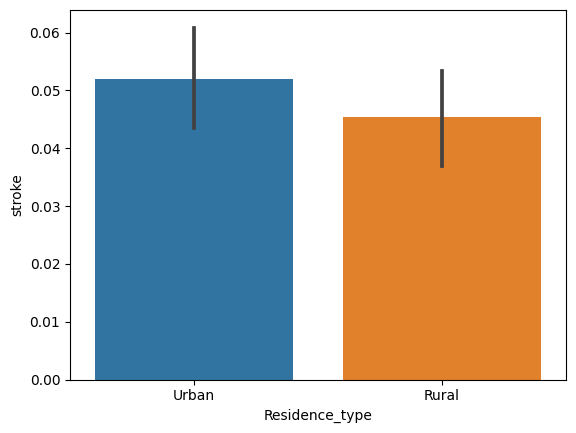

In [ ]:
sns.barplot(x = "Residence_type", y = "stroke", data = df);

In [ ]:
df.groupby(['Residence_type', 'stroke'])['stroke'].count()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64

Местность проживания слабо влияет на вероятность инсульта.

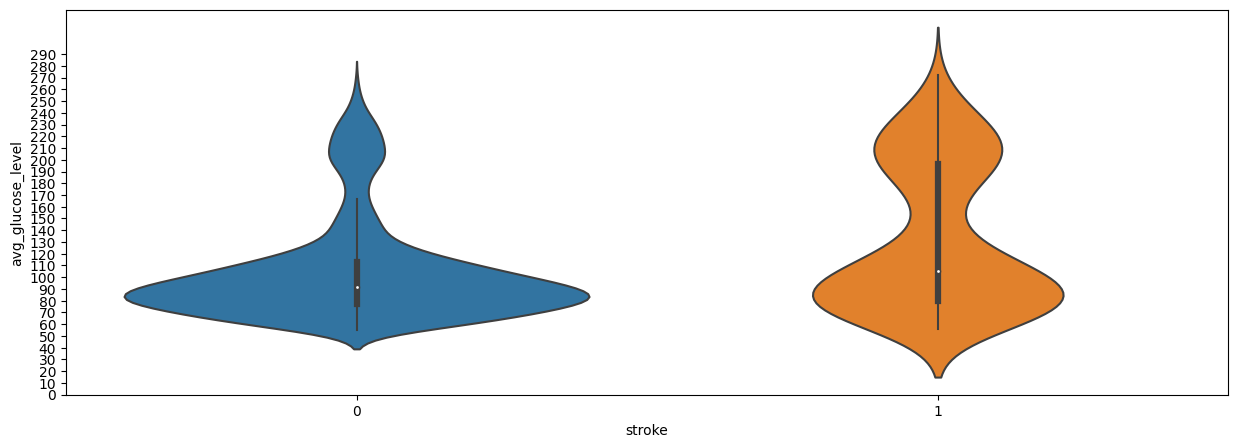

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(y="avg_glucose_level", x="stroke", data=df)
ax.set_yticks(range(0, 300, 10))
plt.show()

Можно сделать вывод, что уровень глюкозы слабо влияет на инсульт.

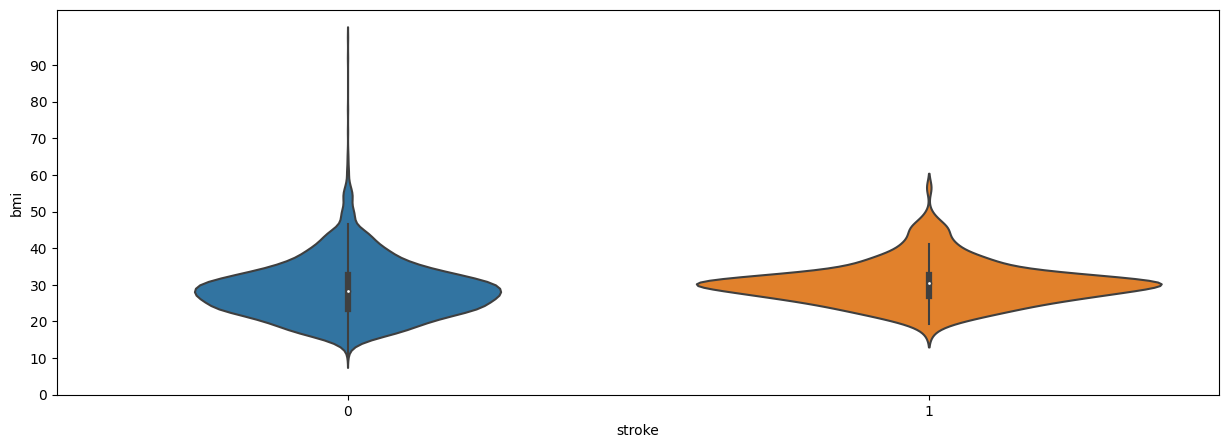

In [ ]:
_, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(y="bmi", x="stroke", data=df)
ax.set_yticks(range(0, 100, 10))
plt.show()

Тут, по сравнению в визуализацией выше, видно, индекс массы тела сильно влияет на факт инсульта.

Выводы:

Возраст и индекс массы тела больше всего влияет на инсульт.

Корреляция признаков:

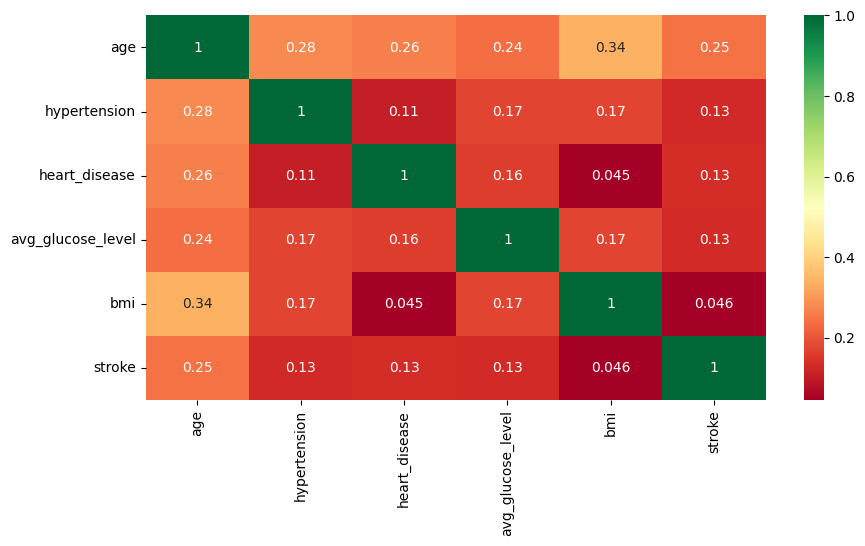

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [ ]:
df['Age_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['age'] <= 25, 'Age_category'] = 0  # далле разбиваем возраста на 5 категорий
df.loc[(df['age'] > 25) & (df['age'] <= 45), 'Age_category'] = 1
df.loc[(df['age'] > 45) & (df['age'] <= 61), 'Age_category'] = 2
df.loc[df['age'] > 61, 'Age_category'] = 3
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,3
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.494719,never smoked,1,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,3
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,3


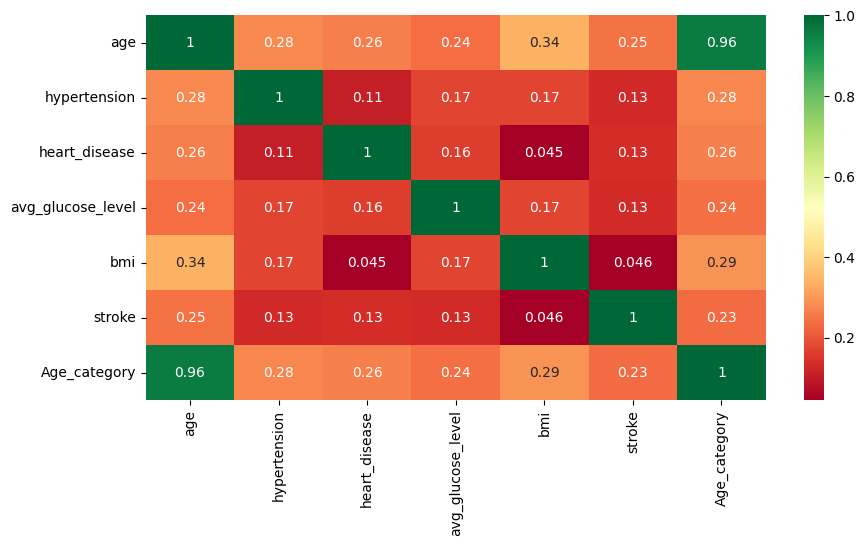

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

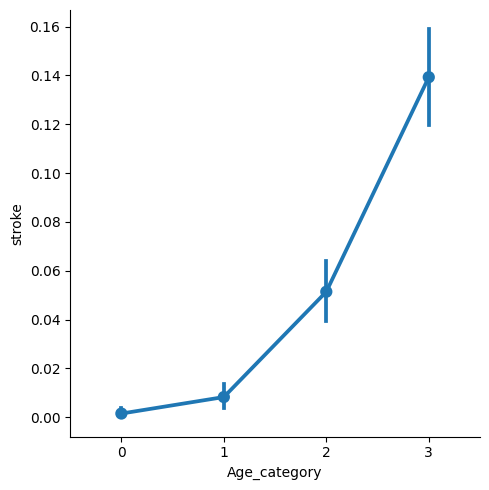

In [ ]:
sns.catplot(x ='Age_category', y='stroke', kind="point", data = df)
plt.show()